# TMDB Box office prediction EDA

## pipeline
### 1. load in data and import packages
### 2. data cleaning
### 3. visualizing correlation with numerical variables
    histogram and correlation map
    heatmap with numerical variables, budget, popularity, runtime, revenue
### 4. analysis with time variable, release data
    1. barplot of release year
    2. barplot of release day
    3. barplot of release month, count of release month
    4. barplot of release quarter, count of release quarter

In [1]:
#1. load in data and import packages
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#1. load in data and import packages
file = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0721wragling_train_t2.csv'
file_test = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0721wragling_test_t2.csv'
df_train = pd.read_csv(file)
df_test = pd.read_csv(file_test)
df_train.head(3)

,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,14000000,Comedy,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Metro-Goldwyn-Mayer (MGM),Paramount Pictures,U...",United States of America,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"duringcreditsstinger,hot tub,sequel,time travel","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"Comedy,Drama,Family,Romance",en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,United States of America,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,falling in love,marriage","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,Drama,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Blumhouse Productions,Bold Films,Right of Way ...",United States of America,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"conservatory,drummer,jazz,jazz band,montage,mu...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


# 2  data cleaning
## 1. keep numerical variable and datetime
### budget, runtime, popularity, release_date
## 2. genre
## 3. original_language
## 4. original_title
## 5. poster_path
## 6. production_companies
## 7. production_countries
## 8. spoken_languages
## 9. status
## 10. title
## 11. cast
## 12. crew
## 13. release date

## 1. keep numerical variable and datetime

In [3]:
#1. drop columns where budget is 0
#df_train = df_train[df_train['budget'] != 0 ]

## 2. genre

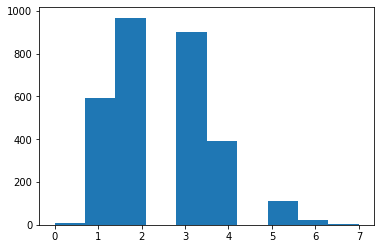

In [4]:
#2. genre
# firstly, check how many genres each movie has
gi = df_train['genres'].str.split(pat = ',')
length = list(0 for i in range(gi.count()))
for i in range(gi.count()):
    if type(gi[i]) == list :
#    print(len(gi[i]))
        length[i]=len(gi[i])
plt.hist(length)
plt.show()

In [5]:
#df_train['genres'].apply(lambda x: len(x.strip().split(','))).value_counts()
df_train['genres'].apply(lambda x: len(str(x).split(','))).value_counts()

2    972
3    900
1    600
4    393
5    111
6     21
7      3
Name: genres, dtype: int64

From the histogram we observed that most movies has genres and varies from 0~7, median is 2. 
To analysis the impact of genres, will firstly get top 2 genres, and also the number of genres as three new variables to replace the variable of genre.

In [6]:
list_genres = []
for count, ele in enumerate(df_train['genres']):
    items = str(ele).strip().split(',')
    list_genres+=items
top_genres = [m[0] for m in collections.Counter([i for i in list_genres]).most_common(5)]
print(top_genres)

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']


In [7]:
df_train['genres'] = df_train['genres'].fillna('')
df_test['genres'] = df_test['genres'].fillna('')

generate seperate columns for top 5 genres

In [8]:
for g in top_genres:
    df_train['genre_' + g] = df_train['genres'].apply(lambda x: 1 if g in x else 0)
df_train['genre_length']=df_train['genres'].apply(lambda x: len(str(x).split(',')))

In [9]:
for g in top_genres:
    df_test['genre_' + g] = df_test['genres'].apply(lambda x: 1 if g in x else 0)
df_test['genre_length']=df_test['genres'].apply(lambda x: len(str(x).split(',')))

In [10]:
df_train = df_train.drop(['genres'], axis = 1)
df_test = df_test.drop(['genres'], axis = 1)

In [11]:
df_train.sample(3)

,budget,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,...,Keywords,cast,crew,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_length
250,12560000,fr,La Vérité si je Mens ! 2,4.052991,/yYRehBmPveMJbsmMvb1tg1SO7t8.jpg,"M6 Métropole Télévision,TF1 Films Production,T...",France,2001-02-07,105.0,fr,...,NaN,"[{'cast_id': 2, 'character': 'Eddie Vuibert', ...","[{'credit_id': '5528db95c3a3681f56001636', 'de...",42700000,0,1,0,0,0,1
535,45000000,en,Miracle at St. Anna,11.221186,/lQ57c15G9TsSL6t5SUtb97zUW4s.jpg,"40 Acres & A Mule Filmworks,On My Own,Rai Cine...","Italy,United States of America",2008-09-15,160.0,"de,en,it",...,"black people,partisan,soldier,toscana,village,...","[{'cast_id': 3, 'character': '2nd Staff Sergea...","[{'credit_id': '53562a460e0a262865002d83', 'de...",9323833,1,0,0,0,0,2
2456,14000000,en,Bee Season,2.308846,/fJEblXhiBMmSWZCbAXru7Mgx1Yf.jpg,NaN,United States of America,2005-09-03,104.0,en,...,NaN,"[{'cast_id': 1, 'character': 'Saul', 'credit_i...","[{'credit_id': '52fe44a1c3a368484e02dc5b', 'de...",6856989,1,0,0,0,0,2


Text(0.5, 1.0, 'Revenue vs number of genres')

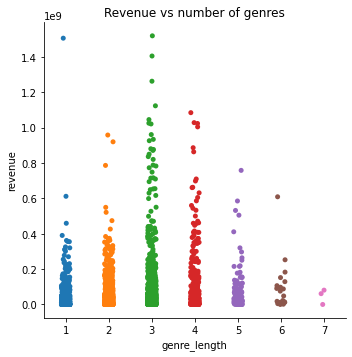

In [12]:
sns.catplot(x = 'genre_length', y = 'revenue', data = df_train)
plt.title('Revenue vs number of genres')

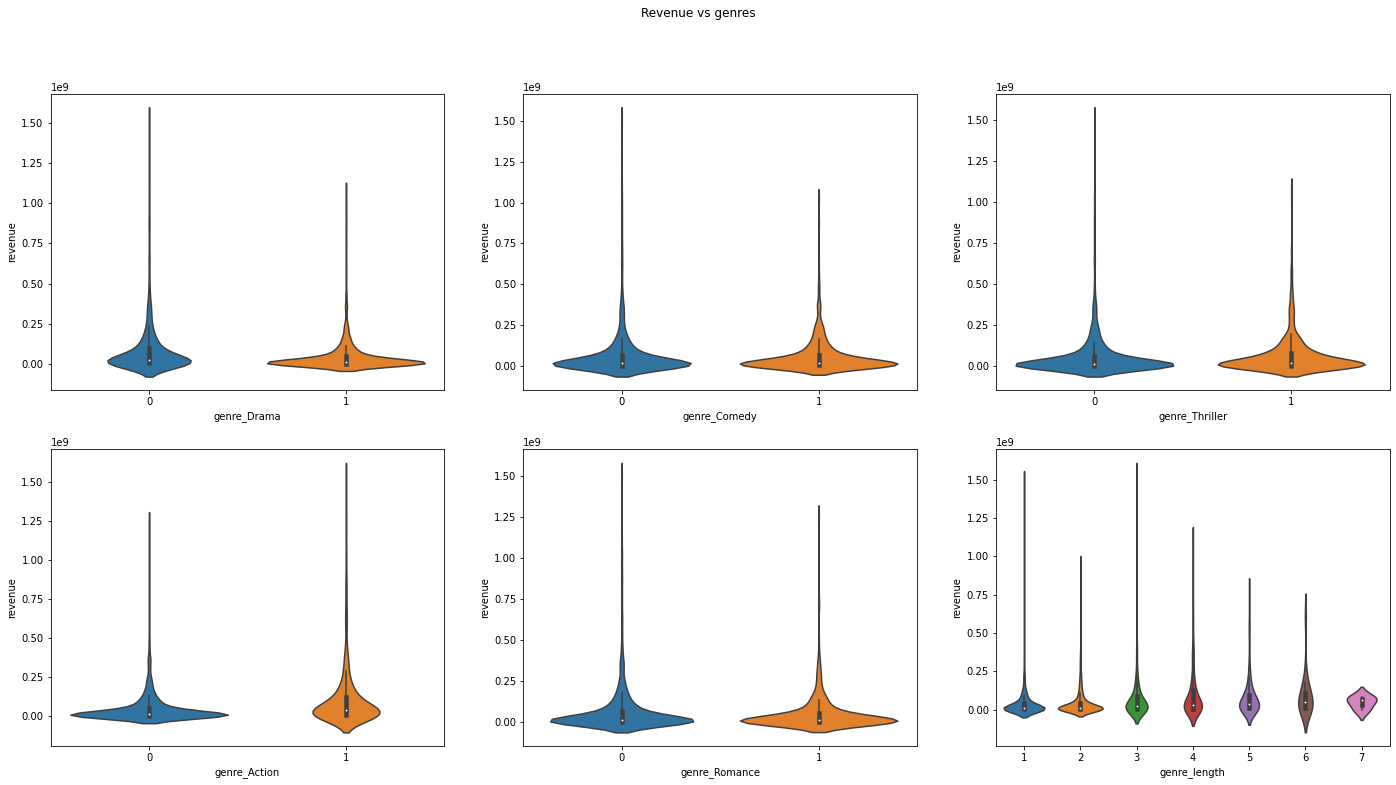

In [13]:
f, axes = plt.subplots(2,3, figsize=(24,12))
plt.suptitle('Revenue vs genres')
for i, e in enumerate([col for col in df_train.columns if 'genre_' in col]):
    sns.violinplot(x = e, y = 'revenue', data = df_train, ax = axes[i//3,i%3]);

## 3. original language

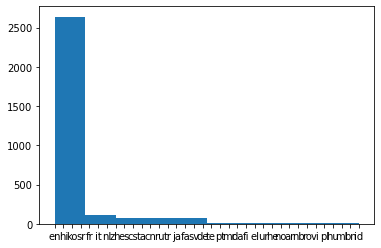

In [14]:
#3. original language
plt.hist(df_train['original_language'])
plt.show()

over 90% original language is english, will define a new variable as en/ no-en

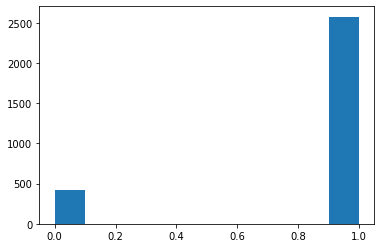

In [15]:
df_train['original_language_en']= [1 if x =='en' else 0 for x in df_train['original_language']]
df_test['original_language_en']= [1 if x =='en' else 0 for x in df_test['original_language']]
plt.hist(df_train['original_language_en'])
plt.show()

Text(0.5, 1.0, 'Revenue vs original language if is english')

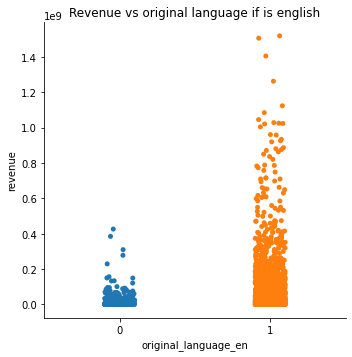

In [16]:
sns.catplot(x = 'original_language_en', y = 'revenue', data = df_train)
plt.title('Revenue vs original language if is english')

## 4. original_title, title

In [17]:
#4. original_title, title
diff_title = df_train[df_train['original_title']!=df_train['title']][['original_title','title']]
print(diff_title)

            original_title              title
4                     마린보이         Marine Boy
15                 Šišanje           Skinning
30            Intouchables   The Intouchables
45           La doppia ora    The Double Hour
50    Aanrijding in Moscou    Moscow, Belgium
...                    ...                ...
2963                    恋空        Sky Of Love
2972                   龍虎門  Dragon Tiger Gate
2980       ആക്ഷൻ ഹീറോ ബിജു   Action Hero Biju
2988                    ده                Ten
2996           Vi är bäst!   We Are the Best!

[351 rows x 2 columns]


## 5. poster path

original title is not in unique language, while title is in english translation. to simplify the model building, will keep the 'title' and delete the variable original title.

In [18]:
#5 poster path
# will delete this column for now.
# tagline, title, and Keywords are all about describtion of movie, will keep title and delete Keywords, tagline for now.
# summarize and clean up dataframe
df_train = df_train.drop(['original_language','original_title','title','poster_path','tagline','Keywords'], axis = 1)
df_test = df_test.drop(['original_language','original_title','title','poster_path','tagline','Keywords'], axis = 1)
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_length,original_language_en
129,2400000,5.230661,"40 Acres & A Mule Filmworks,Columbia Pictures",United States of America,1996-10-16,120.0,en,Released,"[{'cast_id': 3, 'character': 'Jeremiah', 'cred...","[{'credit_id': '52fe4796c3a36847f813dc6f', 'de...",5731103,1,0,0,0,0,1,1
1261,0,9.617662,"FOZ,France 2 Cinéma,Mandarin Film,Wild Bunch",France,2012-09-26,105.0,fr,Released,"[{'cast_id': 13, 'character': 'Germain', 'cred...","[{'credit_id': '56a274f9c3a36838a300023a', 'de...",11879046,1,1,1,0,0,4,0
1183,9000000,7.720692,"19 Entertainment,Protagonist Pictures,Rai Cine...","Italy,United Kingdom",2012-03-09,102.0,"cs,en,fr",Released,"[{'cast_id': 1002, 'character': 'Georges Duroy...","[{'credit_id': '5904da059251416a1400f9f8', 'de...",8303261,1,0,0,0,1,2,1


## 6. production companies

In [19]:
#6. production companies
df_train.count()

budget                  3000
popularity              3000
production_companies    2844
production_countries    2945
release_date            3000
runtime                 3000
spoken_languages        2980
status                  3000
cast                    2987
crew                    2984
revenue                 3000
genre_Drama             3000
genre_Comedy            3000
genre_Thriller          3000
genre_Action            3000
genre_Romance           3000
genre_length            3000
original_language_en    3000
dtype: int64

In [20]:
# production_companies has 5% data missing, will fill those missing values as unkown.
df_train = df_train[df_train['production_companies'].notna()]
df_test = df_test[df_test['production_companies'].notna()]
df_train.count()

budget                  2844
popularity              2844
production_companies    2844
production_countries    2833
release_date            2844
runtime                 2844
spoken_languages        2836
status                  2844
cast                    2831
crew                    2829
revenue                 2844
genre_Drama             2844
genre_Comedy            2844
genre_Thriller          2844
genre_Action            2844
genre_Romance           2844
genre_length            2844
original_language_en    2844
dtype: int64

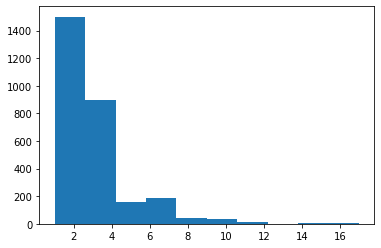

In [21]:
# for each movie, not only one company is involved in production, so will add a new feature to count the number of companies.
df_train = df_train.reset_index(drop = True)
comp = df_train['production_companies'].str.split(pat = ',')
length = list(0 for i in range(comp.count()))
for i in range(comp.count()):
    length[i]=len(comp[i])
plt.hist(length)
plt.show()

In [22]:
# new feature, weather the production company is in top 30.
list_company = []
for count, ele in enumerate(df_train['production_companies']):
    items = ele.strip().split(',')
 #   print(items)
    list_company+=items
top_companies = [m[0] for m in collections.Counter([i for i in list_company]).most_common(30)]
print(top_companies)

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures', 'Walt Disney Pictures', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists', 'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises', ' The', 'BBC Films', 'Dune Entertainment', 'Working Title Films', 'Fox Searchlight Pictures', 'StudioCanal', 'Lionsgate', 'DreamWorks SKG', 'Fox 2000 Pictures', 'Summit Entertainment', 'Hollywood Pictures', 'Orion Pictures', 'Amblin Entertainment']


In [23]:
for g in top_companies:
    df_train['comp_' + g] = df_train['production_companies'].apply(lambda x: 1 if g in x else 0)
df_train['comp_length']=df_train['production_companies'].apply(lambda x: len(str(x).split(',')))
for g in top_companies:
    df_test['comp_' + g] = df_test['production_companies'].apply(lambda x: 1 if g in x else 0)
df_test['comp_length']=df_test['production_companies'].apply(lambda x: len(str(x).split(',')))
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,...,comp_Fox Searchlight Pictures,comp_StudioCanal,comp_Lionsgate,comp_DreamWorks SKG,comp_Fox 2000 Pictures,comp_Summit Entertainment,comp_Hollywood Pictures,comp_Orion Pictures,comp_Amblin Entertainment,comp_length
1752,1549000,4.331811,"Avex Inc.,Basic Pictures,Media Asia Film,Sil-M...","China,Hong Kong",2005-05-12,107.0,"cn,en",Released,"[{'cast_id': 1, 'character': 'Takumi Fujiwara'...","[{'credit_id': '55324f9bc3a36848ca001697', 'de...",...,0,0,0,0,0,0,0,0,0,4
2825,0,3.069108,"Gettin' Rad Productions,Park Pictures",United States of America,2016-09-09,97.0,en,Released,"[{'cast_id': 0, 'character': 'David', 'credit_...","[{'credit_id': '57d923309251415959005090', 'de...",...,0,0,0,0,0,0,0,0,0,2
2604,0,15.597500,"Amazon Studios,Big Indie Pictures,picrow",United States of America,2017-05-12,89.0,en,Released,"[{'cast_id': 1, 'character': 'Isaac', 'credit_...","[{'credit_id': '57827c1cc3a36860a9000001', 'de...",...,0,0,0,0,0,0,0,0,0,3


IndexError: index 6 is out of bounds for axis 0 with size 6

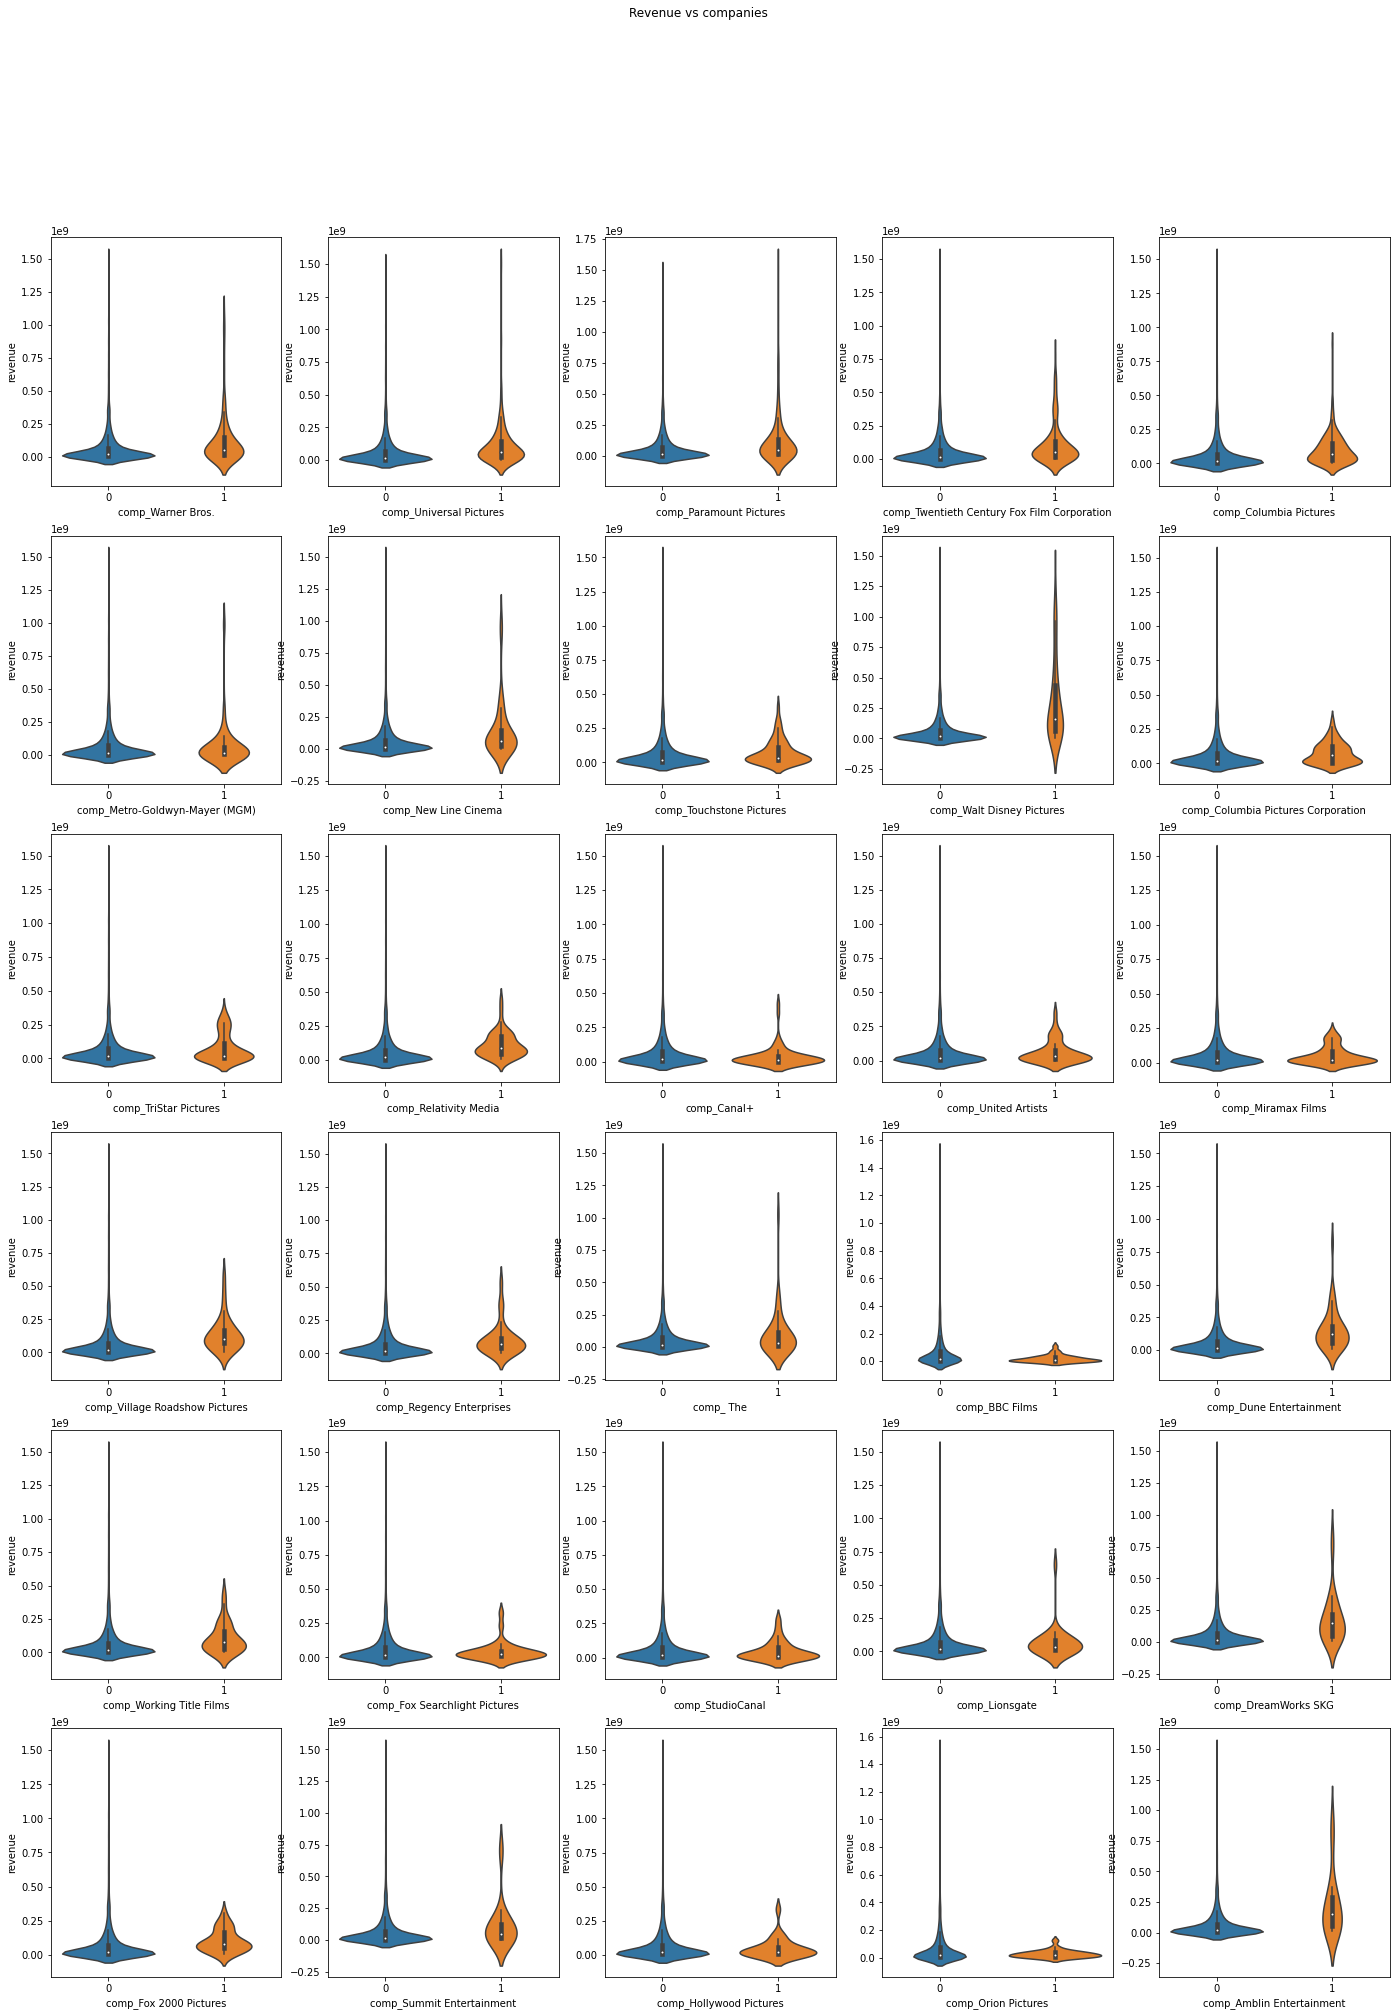

In [24]:
f, axes = plt.subplots(6,5, figsize=(24,32))
plt.suptitle('Revenue vs companies')
for i, e in enumerate([col for col in df_train.columns if 'comp_' in col]):
    sns.violinplot(x = e, y = 'revenue', data = df_train, ax = axes[i//5,i%5]);

## 7. production_countries

In [25]:
#7. production contries
df_train = df_train[df_train['production_countries'].notna()]
df_train = df_train.reset_index(drop = True)
df_test = df_test[df_test['production_countries'].notna()]
df_test = df_test.reset_index(drop = True)

In [26]:
list_country = []
for count, ele in enumerate(df_train['production_countries']):
    items = ele.strip().split(',')
 #   print(items)
    list_country+=items
top_country = [m[0] for m in collections.Counter([i for i in list_country]).most_common(10)]
print(top_country)

['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Italy', 'Australia', 'Japan', 'Spain']


In [27]:
for g in top_country:
    df_train['country_' + g] = df_train['production_countries'].apply(lambda x: 1 if g in x else 0)
df_train['country_length']=df_train['production_countries'].apply(lambda x: len(str(x).split(',')))
for g in top_country:
    df_test['country_' + g] = df_test['production_countries'].apply(lambda x: 1 if g in x else 0)
df_test['country_length']=df_test['production_countries'].apply(lambda x: len(str(x).split(',')))
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,...,country_United Kingdom,country_France,country_Germany,country_Canada,country_India,country_Italy,country_Australia,country_Japan,country_Spain,country_length
2275,0,5.916187,"Columbia Pictures,Universal Pictures,Wildwood ...",United States of America,1979-12-21,122.0,en,Released,"[{'cast_id': 10, 'character': ""Norman 'Sonny' ...","[{'credit_id': '52fe44019251416c75025c3b', 'de...",...,0,0,0,0,0,0,0,0,0,1
282,0,5.385108,Hollywood Pictures,United States of America,1993-06-04,107.0,en,Released,"[{'cast_id': 4, 'character': 'Jennifer Haines'...","[{'credit_id': '52fe43e2c3a36847f80761b1', 'de...",...,0,0,0,0,0,0,0,0,0,1
2622,82000000,7.349843,"Callahan Filmworks,Columbia Pictures Corporati...",United States of America,2005-05-19,113.0,en,Released,"[{'cast_id': 1, 'character': 'Paul Crewe', 'cr...","[{'credit_id': '55c67b06c3a3682481000722', 'de...",...,0,0,0,0,0,0,0,0,0,1


IndexError: index 2 is out of bounds for axis 0 with size 2

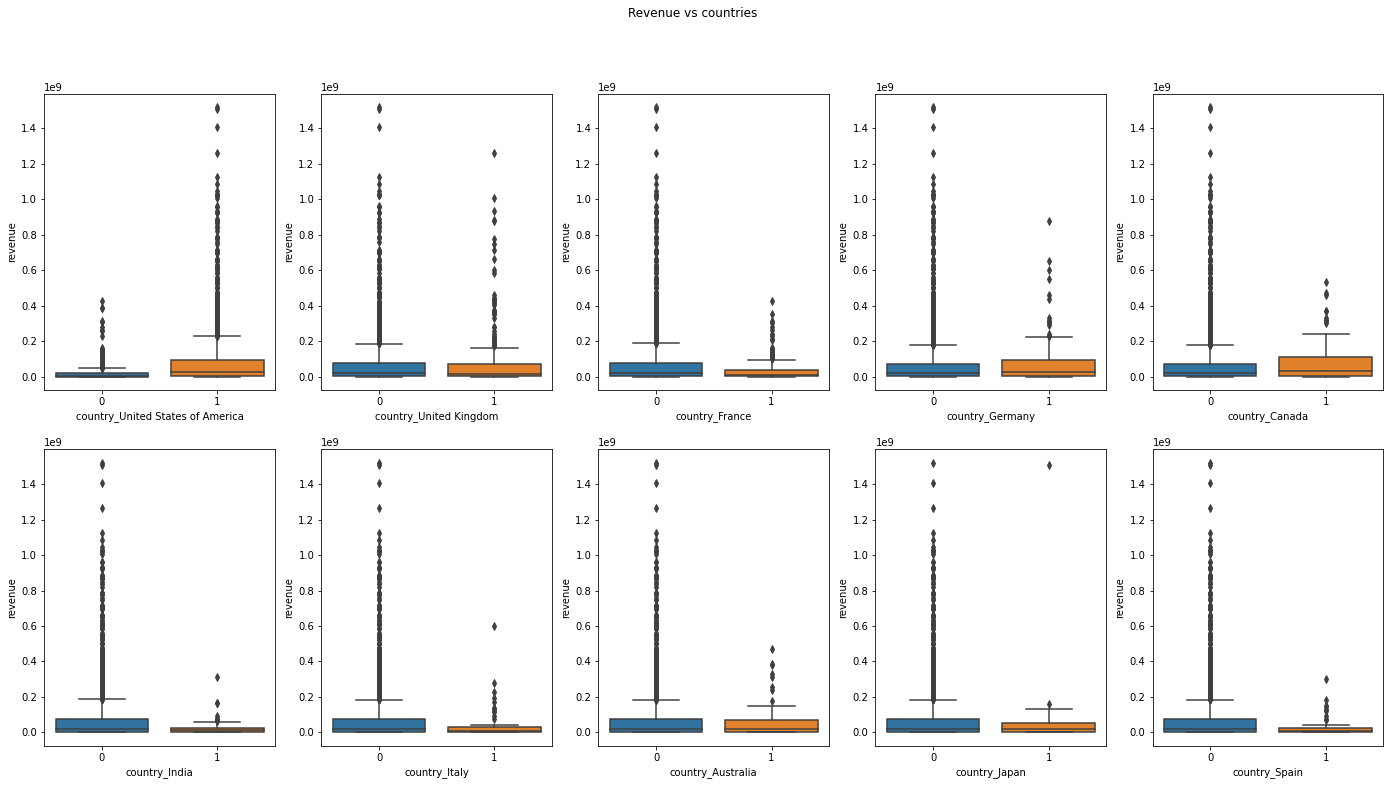

In [28]:
f, axes = plt.subplots(2,5, figsize=(24,12))
plt.suptitle('Revenue vs countries')
for i, e in enumerate([col for col in df_train.columns if 'country_' in col]):
    sns.boxplot(x = e, y = 'revenue', data = df_train, ax = axes[i//5,i%5]);

## 8. spoken language

In [29]:
#8. spoken languages
#number of spoken languages, and if english is one of them
df_train['spoken_languages'].fillna(value = 'no',inplace = True)
spk = df_train['spoken_languages'].str.split(pat = ',')
length = list(0 for i in range(spk.count()))
for i in range(spk.count()):
    if type(spk[i]) == list and spk[i] != 'no':
        length[i]=len(spk[i])
df_train['num_spoken']=length

In [30]:
df_train['spoken_en'] = df_train['spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

In [31]:
df_test['spoken_languages'].fillna(value = 'no',inplace = True)
spk = df_test['spoken_languages'].str.split(pat = ',')
length = list(0 for i in range(spk.count()))
for i in range(spk.count()):
    if type(spk[i]) == list and spk[i] != 'no':
        length[i]=len(spk[i])
df_test['num_spoken']=length
df_test['spoken_en'] = df_test['spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

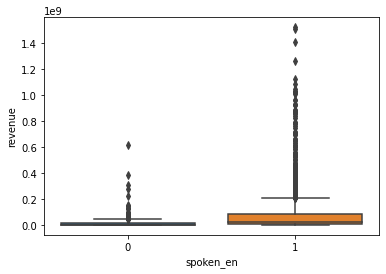

In [32]:
sns.boxplot(x = df_train['spoken_en'], y =df_train['revenue'])

## 9. status

In [33]:
#9. status
df_train['status'].value_counts()

Released    2832
Rumored        1
Name: status, dtype: int64

In [34]:
#delete Rumorsed status
df_train = df_train[df_train['status']!= 'Rumored']
df_train['status'].value_counts()
df_train = df_train.drop(['status'], axis = 1)

df_test = df_test[df_test['status']!= 'Rumored']
df_test['status'].value_counts()
df_test = df_test.drop(['status'], axis = 1)

## 10. title

In [35]:
#10. title
#drop title column
#df_train['title'].isnull

## 11. cast

In [36]:
#11. cast
df_train['cast'][0]
# cast column has cast_id, character, credit_id, gender, id, name, order, profile_path subcolumns. Would like to see how gender affect the revenue

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [37]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [38]:
#create new feature, number of cast genders in a movie , gender 1 = female, gender 2 = male, gender 0 = unknown
list_of_cast_genders = list(df_train['cast'].apply(lambda x: [i['gender'] for i in get_dictionary(x)] if x != {} else []).values)
collections.Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27305), (0, 19765), (1, 13223)]

In [39]:
df_train['genders_cast_0'] =df_train['cast'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_cast_1'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_cast_2'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_cast'] = df_train['cast'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

df_test['genders_cast_0'] =df_test['cast'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_test['genders_cast_1'] = df_test['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_test['genders_cast_2'] = df_test['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_test['num_cast'] = df_test['cast'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

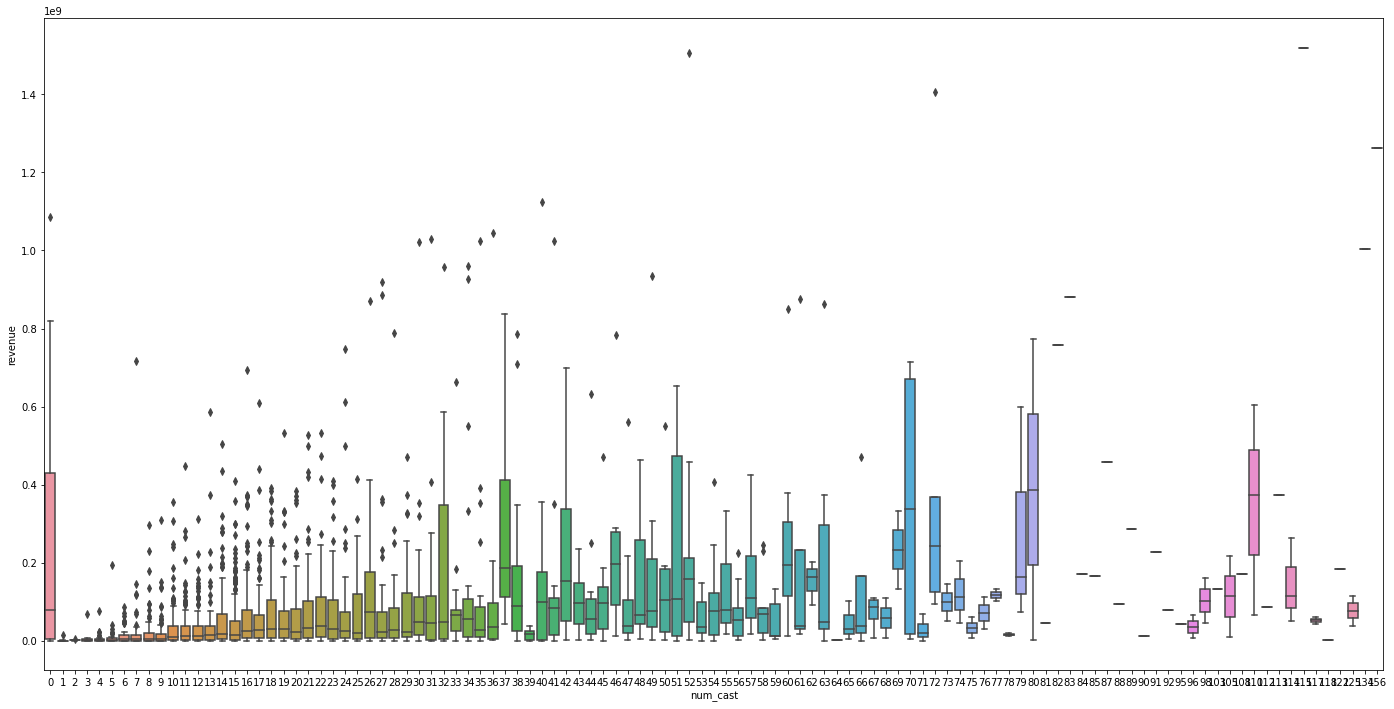

In [57]:
plt.figure(figsize=(24,12))
sns.boxplot(x = 'num_cast', y = 'revenue',data = df_train);

## 12. crew

In [59]:
#12 crew
# will also anlyze the number of crews and gender of crew
df_train['genders_crew_0'] =df_train['crew'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_crew_1'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_crew_2'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_crew'] = df_train['crew'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

df_test['genders_crew_0'] =df_test['crew'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_test['genders_crew_1'] = df_test['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_test['genders_crew_2'] = df_test['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_test['num_crew'] = df_test['crew'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

In [60]:
df_train = df_train[df_train['budget'] != 0]
df_test = df_test[df_test['budget'] != 0]

In [61]:
df_train = df_train.drop(['cast', 'crew'], axis = 1)
df_test = df_test.drop(['cast', 'crew'], axis = 1)
df_train.sample(5)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,revenue,genre_Drama,genre_Comedy,...,num_spoken,spoken_en,genders_cast_0,genders_cast_1,genders_cast_2,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew
1470,7000000,7.791952,Universal Pictures,United States of America,1988-02-05,98.0,en,19595031,0,0,...,1,1,7,2,10,19,10,2,10,22
2084,15000000,7.050403,Paramount Classics,United States of America,2006-12-08,116.0,"cs,en",10903846,1,0,...,2,1,3,6,6,15,0,2,6,8
2271,20000000,6.312206,"Gross Entertainment,Moving Pictures, DPI,Scree...",United States of America,2009-02-20,90.0,en,18599102,0,1,...,1,1,2,14,8,24,2,0,3,5
2679,12500000,1.830829,"HighRoad Entertainment,Kenio Films,Lone Runner...",United States of America,2010-04-01,118.0,en,3878993,1,0,...,1,1,4,3,11,18,8,0,6,14
2557,17000000,1.542355,"Aascar Films,PVP Cinema,Raaj Kamal Films Inter...",India,2013-01-25,147.0,"hi,ta,te",51000000,0,0,...,3,0,2,1,7,10,18,1,5,24


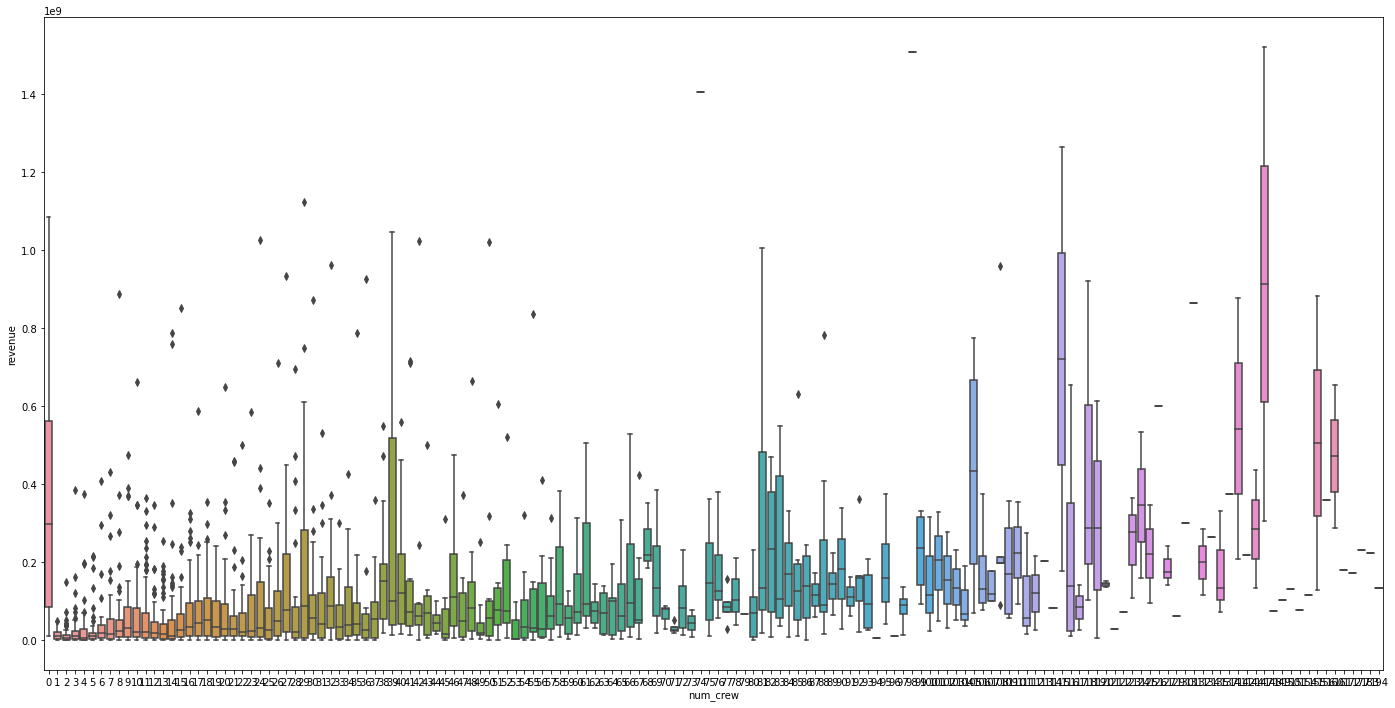

In [62]:
plt.figure(figsize=(24,12))
sns.boxplot(x = 'num_crew', y = 'revenue',data = df_train);

### Revenue less than 100 are suspicious datapoints, will delete them

In [63]:
df_train = df_train[df_train['revenue']>=100]
df_train = df_train.drop(['production_companies', 'production_countries','spoken_languages'], axis = 1)
#df_test = df_test[df_test['revenue']>=100]
df_train.sample(5)

,budget,popularity,release_date,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,...,num_spoken,spoken_en,genders_cast_0,genders_cast_1,genders_cast_2,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew
2334,24000000,6.253084,2009-10-17,93.0,68729358,0,1,0,0,0,...,1,1,11,1,23,35,22,6,13,41
2420,12000000,11.516965,1988-03-11,102.0,7242035,1,0,1,1,0,...,1,1,0,1,5,6,2,2,10,14
820,36000000,7.926621,1997-05-02,95.0,50159144,1,0,1,1,0,...,1,1,1,3,11,15,6,3,7,16
2179,5500000,6.149295,2014-01-18,120.0,5483299,1,1,0,0,0,...,1,1,5,6,16,27,4,2,5,11
1381,210000,3.424057,2053-06-13,80.0,5000000,0,0,0,0,0,...,2,1,4,2,12,18,5,0,13,18


In [64]:
df_test = df_test.drop(['production_companies', 'production_countries','spoken_languages'], axis = 1)
df_test.sample(3)

,budget,popularity,release_date,runtime,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_length,...,num_spoken,spoken_en,genders_cast_0,genders_cast_1,genders_cast_2,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew
311,12000000,5.037671,1986-08-15,88.0,0,1,0,1,0,3,...,1,1,2,2,13,17,1,0,6,7
2923,65000000,6.693589,2012-06-15,87.0,0,1,0,1,0,4,...,1,1,3,6,12,21,3,1,3,7
82,28000000,5.415639,1984-06-22,111.0,0,1,0,0,0,1,...,1,1,2,2,4,8,2,3,7,12


In [65]:
release_date=pd.to_datetime(df_train['release_date'])
df_train['release_day'] = release_date.dt.day
df_train['release_month'] = release_date.dt.month
df_train['release_year'] = release_date.dt.year
df_train['release_quarter'] = release_date.dt.quarter
df_train['release_dayofweek'] = release_date.dt.dayofweek
#df_train['release_day','release_month','release_year','release_quarter','release_dayofweek'] = [release_date.dt.day, release_date.dt.month, release_date.dt.year, release_date.dt.quarter, release_date.dt.dayofweek]
df_train.head(3)

,budget,popularity,release_date,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,...,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew,release_day,release_month,release_year,release_quarter,release_dayofweek
0,14000000,6.575393,2015-02-20,93.0,12314651,0,1,0,0,0,...,24,59,0,13,72,20,2,2015,1,4
1,40000000,8.248895,2004-08-06,113.0,95149435,1,1,0,0,1,...,20,1,4,4,9,6,8,2004,3,4
2,3300000,64.299990,2014-10-10,105.0,13092000,1,0,0,0,0,...,51,49,4,11,64,10,10,2014,4,4


In [66]:
release_date=pd.to_datetime(df_test['release_date'])
df_test['release_day'] = release_date.dt.day
df_test['release_month'] = release_date.dt.month
df_test['release_year'] = release_date.dt.year
df_test['release_quarter'] = release_date.dt.quarter
df_test['release_dayofweek'] = release_date.dt.dayofweek
df_train = df_train.drop(['release_date'], axis = 1)
df_test = df_test.drop(['release_date'], axis = 1)

## 13. release date

In [69]:
# drop where realease year is after 2020
df_train = df_train[df_train['release_year']<=2020]
df_test = df_test[df_test['release_year']<=2020]

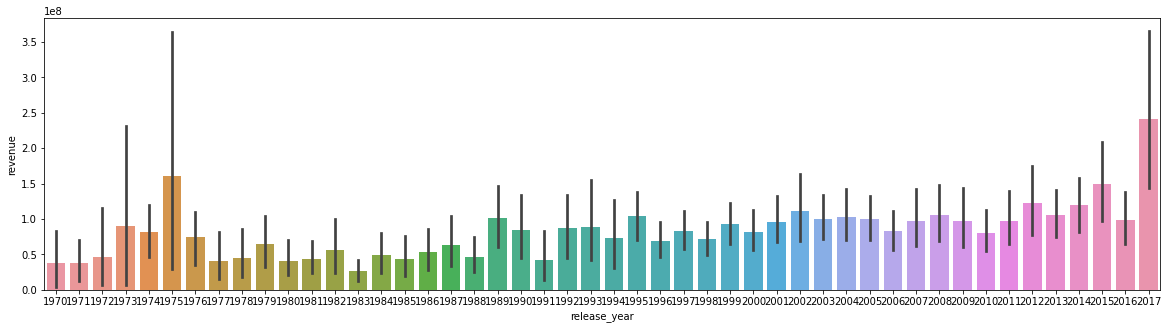

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x='release_year',y='revenue',data=df_train)

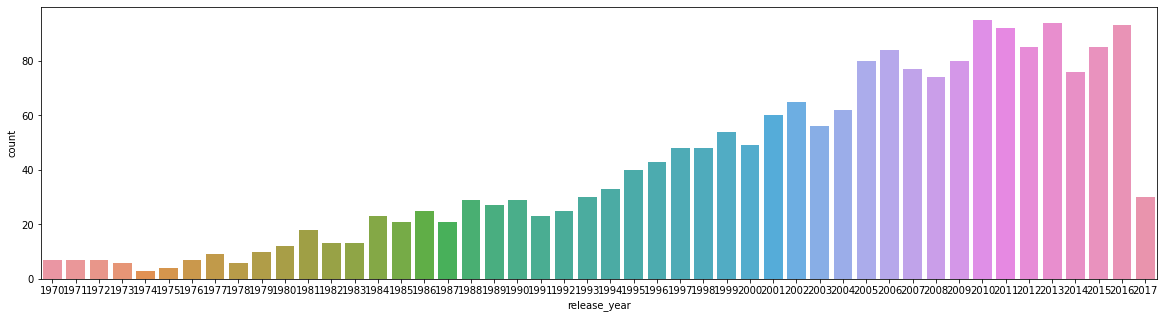

In [71]:
plt.figure(figsize=(20,5))
sns.countplot(df_train['release_year'].sort_values())

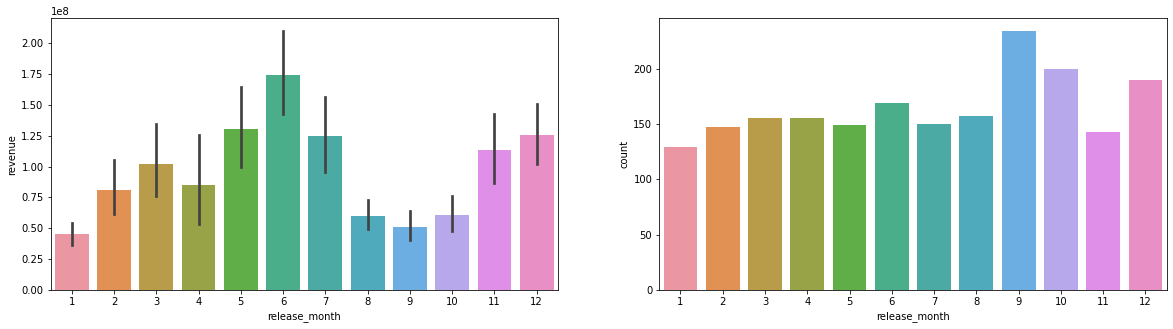

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='release_month',y='revenue',data=df_train)
plt.subplot(1,2,2)
sns.countplot(df_train['release_month'].sort_values())

movies consistantly released all year long, while Movies released from May to July and from November to December has better performance, which are during summer and during winter.
The quarter plot also shows this pattern.

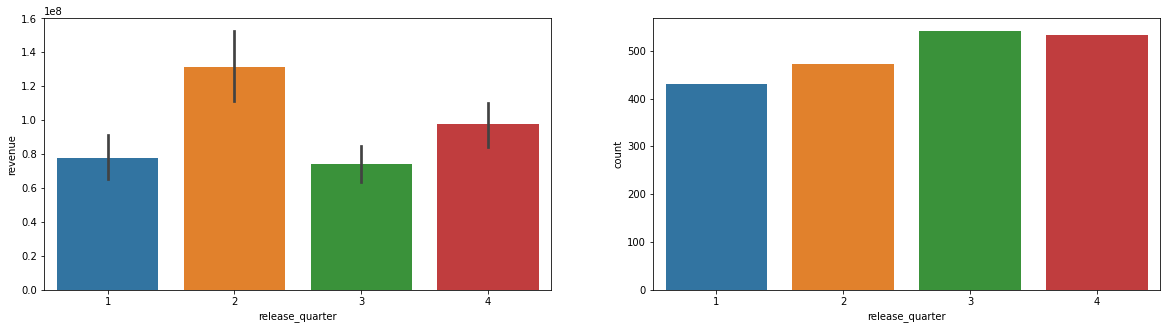

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='release_quarter',y='revenue',data=df_train)
plt.subplot(1,2,2)
sns.countplot(df_train['release_quarter'].sort_values())

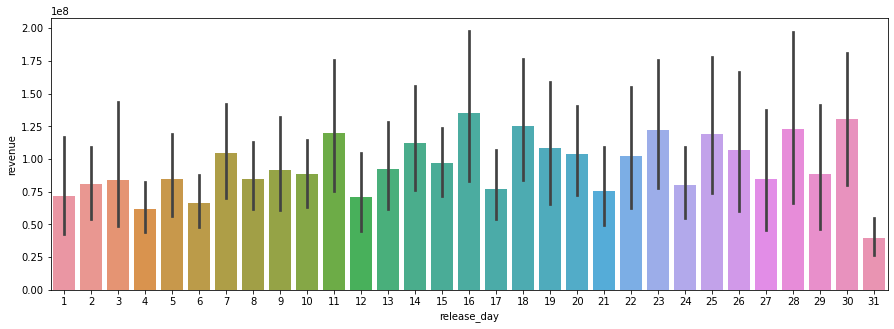

In [74]:
plt.figure(figsize = (15,5))
sns.barplot(x='release_day',y='revenue',data=df_train)

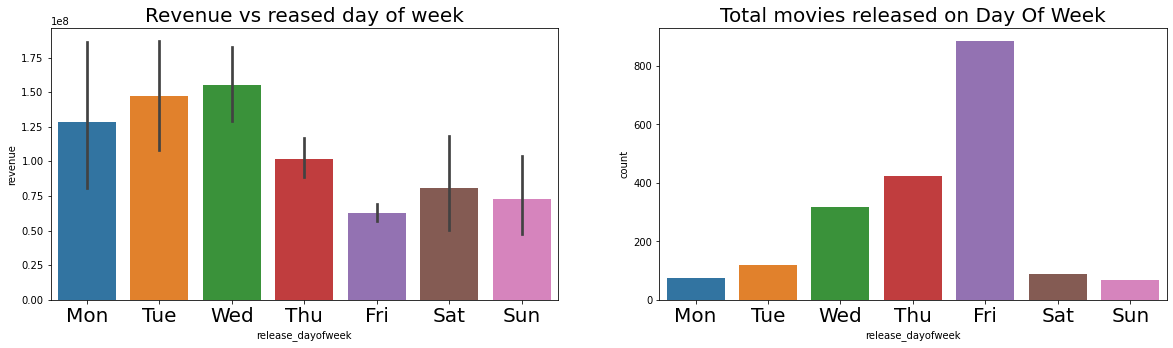

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='release_dayofweek',y='revenue',data=df_train)
plt.title("Revenue vs reased day of week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.subplot(1,2,2)
sns.countplot(df_train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)

plt.show()


In [76]:
df_train.to_csv('/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_train_eda.csv',index = False)

In [77]:
df_test.to_csv('/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_test_eda.csv',index = False)